#load imp libraries

In [1]:
import numpy as np
import matplotlib.pylab as plt
import re
from collections import Counter
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Input, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import os

#Download data

Download the glove model available at https://nlp.stanford.edu/projects/glove/Specification:  Twitter  (2B  tweets,  27B  tokens,  1.2M  vocab,  uncased,  25d,  50d,  100d,  & 200d vectors, 1.42 GB download): glove.twitter.27B.zip

In [2]:
%pwd

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#change the working directory to drive 
import os
os.chdir('/content/drive/MyDrive/NITW/Final project/')

In [5]:
%pwd

'/content/drive/MyDrive/NITW/Final project'

In [6]:
! curl -O http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1449M  100 1449M    0     0  4960k      0  0:04:59  0:04:59 --:--:-- 5734k


In [7]:
!unzip -q glove.twitter.27B.zip -d embedding_data

replace embedding_data/glove.twitter.27B.25d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
os.chdir('/content')
%pwd

'/content'

#Load the glove word embedding into a dictionary where the key is a unique word tokenand the value is a ddimension vector

>Here we can see inside embedding_data, we have 4 files having 100dimension, 200 dimesnion, 25d and 50d vectors.

>For our task, let's use the 50 dimesnion vectors i.e. "glove.twitter.27B.50d.txt"

In [9]:
##Download and Preprocess the Data
# #mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
word_embedding_dict = {} # empty dictionary

with open("/content/drive/MyDrive/NITW/Final project/embedding_data/glove.twitter.27B.200d.txt", 'r', encoding="utf-8") as glove_file:
    for line in glove_file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        word_embedding_dict[word] = vector

In [11]:
len(word_embedding_dict)

1193514

In [12]:
#So the dictionary has more than a million entries. Lets see a few of them

print(word_embedding_dict['hello'])
word_embedding_dict['hello'].shape

[ 3.4683e-01 -1.9612e-01 -3.4923e-01 -2.8158e-01 -7.5627e-01 -4.0035e-02
  5.3422e-01  1.5327e-03 -2.1963e-01 -5.6708e-01 -7.5112e-02  3.9074e-01
  1.9201e-01  4.8046e-02 -1.6801e-01 -1.9140e-01  1.2162e-01 -2.2513e-01
  2.2276e-02 -2.7632e-01  1.0721e-01 -5.8191e-02 -1.7654e-01 -2.0620e-02
 -3.9768e-02  1.2619e-01  1.8927e-01  1.7017e-01 -2.3453e-02 -4.2349e-01
 -4.2640e-02 -2.8101e-01 -3.2461e-01  3.0870e-01  9.4529e-02  1.3559e-01
 -5.0249e-01  3.0072e-01  1.5805e-01  5.5079e-01 -3.7005e-01 -2.1721e-01
 -7.1162e-01  4.2975e-01 -1.2451e-02 -2.4275e-01 -6.2902e-02  4.3755e-02
  5.9098e-02  2.1553e-01  3.4048e-02 -1.5735e-01 -4.4731e-02 -1.2719e-01
  3.3347e-01  2.2386e-01  3.9716e-01  8.4382e-02 -4.7057e-02 -1.4943e-01
  2.0140e-02 -5.1345e-02 -1.7782e-02 -4.8558e-01 -4.4077e-02  3.8690e-01
 -3.5139e-01  8.8997e-01  6.6970e-01 -4.4012e-02  4.2673e-01 -1.9671e-01
 -5.8553e-02  1.0207e-01 -3.7026e-01  2.9633e-01  4.6047e-01  3.5699e-01
 -2.1564e-01  5.0676e-01  4.0541e-01  4.1538e-01  5

(200,)

In [13]:
print(word_embedding_dict['morning'])
word_embedding_dict['morning'].shape

[ 1.7513e-01 -3.5645e-02 -1.5280e-01  1.2789e-01 -8.1739e-02  3.9544e-03
  4.9699e-02  4.9327e-02 -2.0036e-01 -9.7087e-01  1.3116e-01 -2.9954e-01
 -1.0630e-01  1.4835e-01 -2.8138e-01 -5.0671e-01  9.0577e-02 -1.5514e-01
 -2.2512e-01  1.5974e-01  3.5446e-01  3.0933e-01 -6.4611e-02  1.8449e-01
  3.9034e-01  1.2109e+00 -5.0995e-01  7.4940e-02  2.3574e-01 -5.6834e-01
 -4.0619e-01 -2.0566e-01 -2.8768e-02  4.3720e-01  2.3840e-01  3.5266e-01
 -7.0234e-01  6.5225e-01  2.6356e-01  5.3510e-01 -3.2218e-02  2.0903e-01
  7.3437e-02  4.9300e-01  4.8715e-01 -1.4673e-01  7.1360e-03  1.5482e-01
 -2.8260e-01 -1.0312e-02 -1.3765e-01 -3.4539e-01 -3.5003e-02 -4.4507e-03
  1.9730e-01  5.9487e-01 -4.7780e-02 -1.2509e-01  6.3074e-01  1.4180e-01
 -2.9888e-01 -4.3087e-01 -5.0525e-01  1.2222e-01  2.1973e-01 -4.9185e-01
  9.8437e-02  5.2103e-02  3.0569e-01 -2.2386e-01 -3.8399e-02  8.4654e-03
  2.6320e-02 -3.4285e-01  2.8355e-01  4.3037e-01  1.4519e-01 -1.6492e-01
 -2.8264e-01  5.3949e-01  2.6535e-01 -1.0983e-01  5

(200,)

As we can see from the above examples, words such as 'hello' and 'morning' have now been represented as a 50 dimension vector

# Data Loading - Movie dialogs

The only two files we need for our activity is the movie_lines.txt and the movie_conversations.txt. Lets look at these two files and understand the data and their relationship

In [14]:
!unzip -q "/content/drive/MyDrive/NITW/Final project/cornell_movie_dialogs_corpus.zip" -d "/content/drive/MyDrive/NITW/Final project/dataset"

replace /content/drive/MyDrive/NITW/Final project/dataset/cornell movie-dialogs corpus/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [15]:
movie_lines = open('/content/drive/MyDrive/NITW/Final project/dataset/cornell movie-dialogs corpus/movie_lines.txt', encoding='utf-8', errors='ignore').read().split('\n')

In [16]:
print(movie_lines[0])
print(movie_lines[100])
len(movie_lines), type(movie_lines)

L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!
L394 +++$+++ u4 +++$+++ m0 +++$+++ JOEY +++$+++ It's more


(304714, list)

In [17]:
# movie_conversations = open('/content/drive/MyDrive/A6.1 - Point of Sale Data/movie_conversations.txt', encoding='utf-8', errors='ignore').read().split('\n')
movie_conversations = open('/content/drive/MyDrive/NITW/Final project/dataset/cornell movie-dialogs corpus/movie_conversations.txt', encoding='utf-8', errors='ignore').read().split('\n')
len(movie_conversations), type(movie_conversations)

(83098, list)

In [18]:
print(movie_conversations[10])
print(movie_conversations[50])

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L367', 'L368']
u0 +++$+++ u5 +++$+++ m0 +++$+++ ['L904', 'L905', 'L906', 'L907', 'L908']


##Observation from above 2 files:

From the above data samples, we understand the following

* Each line in both files uses " +++$+++ " as a field separator
* In the 'conversation' file, for each line, the last field is a list of Line IDs. The other fields can be ignored
* In the 'lines' file, the first field is the Line ID and the last field is the actual text. The other fields can be ignored

With this knowledge, lets read the two files and extract only the information that will be useful for our activity.

In [19]:
lines_dict = {} # empty dictionary
for movie_line in movie_lines:
  fields = movie_line.split(' +++$+++ ')
  lines_dict[fields[0]] = fields[-1]

len(lines_dict)

304714

In [20]:
print(lines_dict['L104'])
print(lines_dict['L390'])

Expressing my opinion is not a terrorist action.
Will Bogey get bent?


The lines dictionary has 304714 entries which matches the size of "movie_lines.txt" file we saw above. The 'key' for the dictionary is the LineID and the value is the actual text.

### Now lets look at the data from "movie_conversations.txt" file

In [21]:
conv_list = [] # empty list

for conv in movie_conversations:
  fields = conv.split(' +++$+++ ')
  lines_in_conv = fields[-1]
  lines_in_conv = lines_in_conv.replace("'","")   #remove single quotes
  lines_in_conv = lines_in_conv.replace(",","")   #remove commas
  lines_in_conv = lines_in_conv.replace("[","")   #remove square brackets
  lines_in_conv = lines_in_conv.replace("]","")   #remove square brackets
  lines_in_conv_list = lines_in_conv.split()
  conv_list.append(lines_in_conv_list)

print(len(conv_list))
print(conv_list[50])

83098
['L904', 'L905', 'L906', 'L907', 'L908']


The conversation list has 83908 elements which matches the size of "movie_conversations.txt" we saw earlier. Each element is, in turn, a list of Line IDs. So it is a list of lists

## Data Preperation

In [22]:
# Lets first get an idea of the number of words in each line. 
# Some may have only one word such as "Hello", 
# but others will have a lot more.

word_len_dict = {}
for key, value in lines_dict.items():
  word_len = len(value.split())
  if word_len not in word_len_dict:
    word_len_dict[word_len] = 1
  else:
    word_len_dict[word_len] += 1

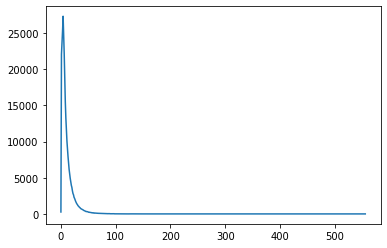

In [23]:
# Lets plot the various lengths and see how they are distributed.
my_lists = sorted(word_len_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*my_lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

From the above graph it looks like word lengths of more than 30 or 40 are fairly uncommon. So lets select a MAX_WORD_COUNT = 25. This means any line with more than 25 words will be ignored from our processing

In [24]:
MAX_WORD_COUNT = 16 # this is what we will use for our processing

In [25]:
# Utility function to remove any punctuations from the sentences and 
# also to standardize certain short forms such as "that's" and convert it to 
# its full form "that is". Another example could be to convet "I'll" to "I will"
# It will also convert everything to lower case
def cleanse_text(mytext):
   mytext = mytext.lower()
   mytext = re.sub(r"he's", "he is", mytext)
   mytext = re.sub(r"she's", "she is", mytext)
   mytext = re.sub(r"won't", "will not", mytext)
   mytext = re.sub(r"can't", "can not", mytext)   
   mytext = re.sub(r"\'ll", " will", mytext)
   mytext = re.sub(r"\'ve", " have", mytext)
   mytext = re.sub(r"\'re", " are", mytext)
   mytext = re.sub(r"\'d", " would", mytext)
   mytext = re.sub(r"i'm", "i am", mytext)
   mytext = re.sub(r"that's", "that is", mytext)
   mytext = re.sub(r"what's", "what is", mytext)
   mytext = re.sub(r"where's", "where is", mytext)
   mytext = re.sub(r"[^\w\s]", "", mytext)   #this will remove any punctuations
   return mytext

In [26]:
# Lets test the cleanse function a couple of times

print(cleanse_text("Where're the students???"))

print(cleanse_text("What's the time? We'll have a lot of time. "))

where are the students
what is the time we will have a lot of time 


Now lets use the movie corpus and create a list of cleansed "inputs" and their cleansed "responses"

In [27]:
input_sentences = []
response_sentences = []

for conv_item in conv_list:
  for ctr in range(len(conv_item)-1):
    input_sentences.append(cleanse_text(lines_dict[conv_item[ctr]]))
    response_sentences.append(cleanse_text(lines_dict[conv_item[ctr+1]]))

Lets see how our lists are looking

In [28]:
len(input_sentences), len(response_sentences) # lengths should be equal

(221616, 221616)

In [29]:
# Lets see a input-response pair

print(input_sentences[90])
print(response_sentences[90])

after that i swore i would never do anything just because everyone else was doing it  and i havent since except for bogeys party and my stunning gastrointestinal display 
why didnt you tell me


In [30]:
# Lets see another input-response pair

print(input_sentences[1090])
print(response_sentences[1090])

fire department  firemen dont carry guns
oh yeah  guess again


So as you can see from the above examples, you can see a basic "dialog" dataset that is taking shape

Next lets filter out all those conversations where either the input or the response has more than 25 words

In [31]:
input_sentences_filtered = []
response_sentences_filtered = []

In [32]:
MAX_WORD_COUNT_NEW = MAX_WORD_COUNT - 2 
# since we will be adding <start> and <end> tags
# to each sentence to mark the start end and of each sentence

for i in range(len(input_sentences)):
  if len(input_sentences[i].split()) <= MAX_WORD_COUNT_NEW and len(response_sentences[i].split()) <= MAX_WORD_COUNT_NEW:
    input_sentences_filtered.append(input_sentences[i])
    response_sentences_filtered.append(response_sentences[i])

In [33]:
len(input_sentences_filtered), len(response_sentences_filtered) # lengths should still be equal

(134186, 134186)

So we still have around 180k dialog pairs (out of the original 221k pairs) where both input and response are within the 23 word length limit

Lets now add < start > and < end > to each sentence so that the training model can identify the start and end of each sentence 

In [34]:
input_sentences_with_start_end = []
response_sentences_with_start_end = []

for i in range(len(input_sentences_filtered)):
  input_sentences_with_start_end.append('<start> ' + input_sentences_filtered[i] + ' <end>')
  response_sentences_with_start_end.append('<start> ' + response_sentences_filtered[i] + ' <end>')

In [35]:
len(input_sentences_with_start_end), len(response_sentences_with_start_end) 
# lengths should still be equal, and should still be same as what we saw before
# i.e. 180353 

(134186, 134186)

In [36]:
#  Lets see a input-response pair and make sure it still has the same dialog
# structure as earlier - just with the extra start and end tags

print(input_sentences_with_start_end[1000])
print(response_sentences_with_start_end[1000])

<start> you are hopeless <end>
<start> that is the way i see it too <end>


# One Hot Encoding

In [37]:
response_counter = Counter()

for sentence in response_sentences_with_start_end:
  for word in sentence.split():
    response_counter[word] += 1
len(response_counter)

30184

We need to also include the first input sentence into this vocabulary since it was not part of the response dataset. So lets do it separately

In [38]:
for word in input_sentences_with_start_end[0].split():
    response_counter[word] += 1

In [39]:
len(response_counter)

30185

So our vocabulary has 40755 words, lets see the top 20 most commonly occuring words

In [40]:
response_counter.most_common(20)

[('<start>', 134187),
 ('<end>', 134187),
 ('you', 39719),
 ('i', 37652),
 ('the', 19555),
 ('to', 15992),
 ('a', 15254),
 ('is', 14707),
 ('it', 12682),
 ('what', 12595),
 ('that', 11167),
 ('are', 10120),
 ('me', 8372),
 ('not', 8235),
 ('no', 7681),
 ('dont', 7539),
 ('am', 7466),
 ('have', 7326),
 ('of', 7012),
 ('do', 6813)]

As expected, the start and end tags are part of every single sentence and hence are at the top of our list. Other commonly used words (such as articles) are also very common. 

As an approximation, lets only include those words in our vocabulary which at least occur in 0.1% of our sentences. Since our total sentence count is around 180k, lets go with 180 as our cut-off

In [41]:
ctr = 0
for x in response_counter.values():
  if x > 180:
    ctr += 1

ctr 

431

So there are 641 words that we can consider as part of our vocabulary. Any words outisde of this list will be treated as 'unknown'. This assumption will let us train our model in a reasonable time, but it might come at the cost of 'intellignce' for our Chatbot

# Vocabulary Creation

In [42]:
target_word2id = dict()

for idx, word in enumerate(response_counter.most_common(641)):
    target_word2id[word[0]] = idx + 1 

if 'unknown' not in target_word2id:
    target_word2id['unknown'] = 0
target_id2word = dict([(idx, word) for word, idx in target_word2id.items()])
num_decoder_tokens = len(target_id2word)+1
np.save('/word-glove-target-word2idx.npy', target_word2id)
np.save('/word-glove-target-idx2word.npy', target_id2word)

In [43]:
target_word2id = dict()

for idx, word in enumerate(response_counter.most_common(641)):
    target_word2id[word[0]] = idx + 1 # we are starting with index = 1 because we want to use index 0 for our 'padding' sequence.

In [44]:
len(target_word2id.values())

641

In [45]:
target_word2id.values()

dict_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [46]:
# Lets include a 'padding' sequence and an 'unknown' sequence to our dict
target_word2id['<pad>'] = 0
target_word2id['<unk>'] = 642

len(target_word2id.values())

643

Lets see what our one hot encoded vocabulary can be used for

In [47]:
target_word2id['how'], target_word2id['are'], target_word2id['you']

(48, 12, 3)

So 'how are you' can be represented as (57, 12 3) in a one hot encoded space of 643 dimensions

Lets also create a 'transpose' of this vocabulary object - one which can be used to map an id to a word (and not the other way around)

In [48]:
target_id2word =  dict([(idx, word) for word, idx in target_word2id.items()])
len(target_id2word)

643

In [49]:
target_id2word[57] + ' ' + target_id2word[12] + ' ' + target_id2word[3]

'did are you'

So as you can see, our vocabulary of size 643 is ready. And we have dictionaries that can help us map a word to an id and vice versa. 

Lets save these two dictionaries as numpy files

In [50]:
np.save('target_word2id.npy', target_id2word)
np.save('target_id2word.npy', target_word2id)

# Model Creation

In [51]:
num_encoder_tokens = len(target_id2word)
num_decoder_tokens = len(target_id2word)

In [52]:
import tensorflow as tf
encoder_inputs = tf.keras.layers.Input(shape=( None , ))
encoder_embedding = tf.keras.layers.Embedding( num_decoder_tokens, 50 , mask_zero=True) (encoder_inputs)
encoder_outputs , state_h , state_c = tf.keras.layers.LSTM( 50 , return_state=True )( encoder_embedding )
encoder_states = [ state_h , state_c ]

decoder_inputs = tf.keras.layers.Input(shape=( None ,  ))
decoder_embedding = tf.keras.layers.Embedding( num_decoder_tokens, 50 , mask_zero=True) (decoder_inputs)
decoder_lstm = tf.keras.layers.LSTM( 50 , return_state=True , return_sequences=True )
decoder_outputs , _ , _ = decoder_lstm ( decoder_embedding , initial_state=encoder_states )
decoder_dense = tf.keras.layers.Dense( num_decoder_tokens , activation=tf.keras.activations.softmax ) 
output = decoder_dense ( decoder_outputs )



In [53]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [54]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [55]:
model_arch = model.to_json()
open('model-architecture.json', 'w').write(model_arch)

3541

In [56]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 50)     32150       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 50)     32150       input_2[0][0]                    
______________________________________________________________________________________________

In [57]:
encoder_input_data = np.zeros((len(input_sentences_with_start_end), 25), dtype='float32')
decoder_input_data = np.zeros((len(response_sentences_with_start_end), 25), dtype='float32')
decoder_target_data = np.zeros((len(response_sentences_with_start_end), 25, num_decoder_tokens), dtype='float32')

In [58]:
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=128,
          epochs=10,
          validation_split=0.20)

In [59]:
model.save_weights('model-weights.h5')
#
# # print("Model weights saved to disk")

In [60]:
# Predictions
# define the encoder model 
encoder_model = Model(encoder_inputs, encoder_states)
encoder_model.summary()
# define the encoder model 
encoder_model = Model(encoder_inputs, encoder_states)
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 50)          32150     
_________________________________________________________________
lstm (LSTM)                  [(None, 50), (None, 50),  20200     
Total params: 52,350
Trainable params: 52,350
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 50)          32150     
______________________________________

In [61]:
# Redefine the decoder model with decoder will be getting below inputs from encoder while in prediction
decoder_state_input_h = Input(shape=(50,))
decoder_state_input_c = Input(shape=(50,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

In [62]:
embedding_size = 50
embed2 =  Embedding(num_decoder_tokens, embedding_size)
final_dex= embed2(decoder_inputs)

In [63]:
final_dex2= embed2(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(final_dex2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)

In [64]:
# sampling model will take encoder states and decoder_input(seed initially) and output the predictions(response word index) We dont care about decoder_states2
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [65]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_word2id['<start>']
    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = target_id2word[sampled_token_index]
        decoded_sentence += ' '+sampled_char
        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '<end>' or
           len(decoded_sentence) > 25):
            stop_condition = True
        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        # Update states
        states_value = [h, c]
    return decoded_sentence

# Test the chatbot

In [66]:
def determineChatBotResponse(my_input_text):
    input_words = my_input_text.split()
    print('Length of input ', len(input_words))
    if len(input_words) > 24:
        print('Truncating the question to 25 words')
        input_words = input_words[0:25]        
    else:
        padding_required = 25 - len(input_words)
        for i in range(padding_required):
            input_words.append('<unk>')    
    
    print("Adjusting length to 25")
    input_outer_list = []
    input_inner_list = []
    for word in input_words:
        if word in target_word2id:
            input_inner_list.append(target_word2id[word])
        else:
            input_inner_list.append(642)
    input_outer_list.append(input_inner_list)
    decoded_sentence =  decode_sequence(input_outer_list)
    print("Bot Response = ", decoded_sentence)

In [67]:
determineChatBotResponse("He used to be really popular when he started high school then it was just like he got sick of it and stopped caring")

Length of input  24
Adjusting length to 25
Bot Response =   certainly certainly certainly


In [68]:
determineChatBotResponse('are you a man')

Length of input  4
Adjusting length to 25
Bot Response =   oh been alive face been face
